# 1. 데이터 생성
- 남자, 여자의 키와 몸무게 데이터를 군집화

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.randint(40,95) # 40~95 정수 하나를 무작위 반환

73

In [3]:
data = []
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,170)]) # 여자데이터
    data.append([random.randint(60,90), random.randint(160,195)]) # 남자데이터


In [10]:
print('여자 몸무게 :', [d[0] for d in data[::2]])
print('여자 키 :', [d[1] for d in data[::2]])
print('남자 몸무게 :', [d[0] for d in data[1::2]])
print('남자 키 :', [d[1] for d in data[1::2]])


여자 몸무게 : [59, 69, 54, 46, 55, 69, 47, 54, 47, 57, 44, 48, 50, 42, 51, 65, 52, 48, 62, 61, 41, 59, 53, 49, 49, 68, 46, 67, 43, 53, 42, 62, 66, 50, 62, 52, 63, 57, 52, 41, 56, 67, 62, 48, 69, 59, 67, 41, 69, 44]
여자 키 : [157, 161, 145, 160, 160, 170, 148, 152, 166, 161, 167, 151, 142, 157, 158, 147, 164, 158, 159, 170, 151, 156, 158, 143, 140, 167, 140, 166, 147, 162, 147, 162, 155, 142, 152, 150, 158, 148, 140, 159, 150, 147, 149, 156, 159, 154, 169, 143, 147, 163]
남자 몸무게 : [83, 80, 69, 69, 78, 90, 70, 76, 83, 81, 71, 78, 81, 69, 61, 62, 74, 90, 81, 64, 60, 67, 60, 87, 78, 83, 69, 74, 60, 87, 71, 90, 82, 73, 60, 67, 67, 90, 76, 75, 79, 64, 90, 62, 64, 67, 64, 72, 78, 81]
남자 키 : [161, 173, 191, 194, 171, 167, 195, 176, 182, 174, 183, 178, 194, 190, 168, 167, 173, 184, 187, 170, 185, 182, 191, 174, 194, 169, 185, 192, 169, 187, 162, 195, 179, 168, 161, 162, 164, 176, 162, 170, 178, 182, 163, 178, 167, 184, 163, 179, 189, 180]


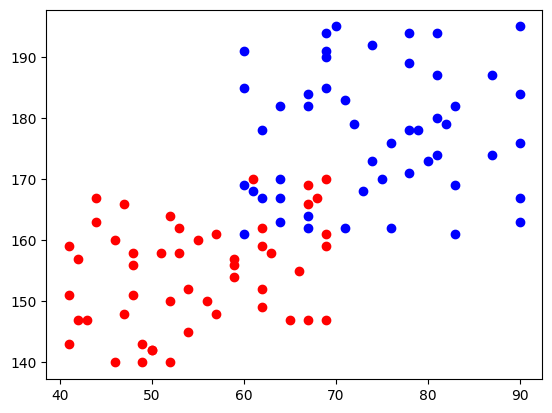

In [16]:
plt.plot([d[0] for d in data[::2]],[d[1] for d in data[::2]], 'o', color='r')
plt.plot([d[0] for d in data[1::2]],[d[1] for d in data[1::2]], 'o', color='b')

# 2. 군집화 로직
1. 두 랜덤 지점에 포인트를 잡고 반으로 나눈다
2. 반으로 나눈 지점에서 각 값들의 중앙값을 찾는다
3. 포인트를 중앙값으로 바꾼다
4. 위 내용을 반복한다

In [37]:
# 초기 랜덤지정 2개 
random_points = [[random.randint(40,95),random.randint(140,195)],
                 [random.randint(40,95),random.randint(140,195)]]
random_points

[[60, 185], [86, 168]]

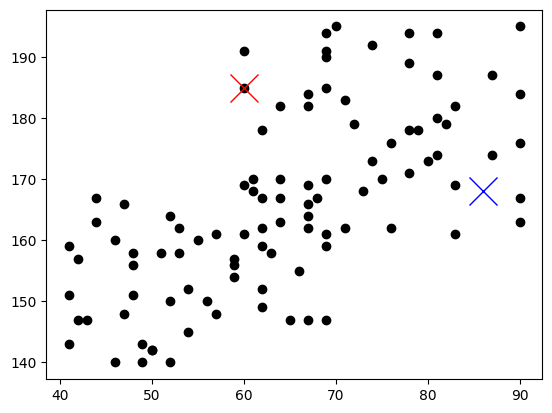

In [38]:
plt.plot([d[0] for d in data],[d[1] for d in data], 'o', color='k')
plt.plot(random_points[0][0],random_points[0][1], 'x', color='r', markersize=20)
plt.plot(random_points[1][0],random_points[1][1], 'x', color='b', markersize=20)

In [20]:
def dist(a,b):
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

In [41]:
a = random_points[0]
b = random_points[1]
dist(a,b)

31.064449134018133

In [43]:
group1 = []
group2 = []
for d in data:
    if dist(random_points[0],d) < dist(random_points[1],d):
        group1.append(d) # 빨간 X랑 더 가까운 그룹
    else:
        group2.append(d) # 파란 X랑 더 가까운 그룹
len(group1), len(group2)

(56, 44)

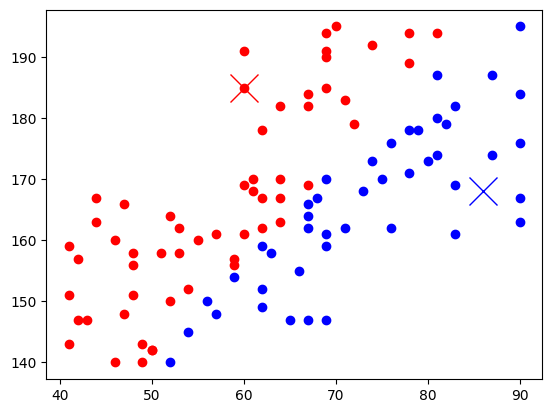

In [50]:
plt.plot([d[0] for d in group1],[d[1] for d in group1],'o',c='r')
plt.plot([d[0] for d in group2],[d[1] for d in group2],'o',c='b')
plt.plot(random_points[0][0],random_points[0][1], 'x', color='r', markersize=20)
plt.plot(random_points[1][0],random_points[1][1], 'x', color='b', markersize=20)

In [56]:
sumX, sumY = 0,0
for g in group1:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점
random_points[0] = [sumX/len(group1), sumY/len(group1)]

sumX, sumY = 0,0
for g in group2:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점
random_points[1] = (sumX/len(group2), sumY/len(group2))

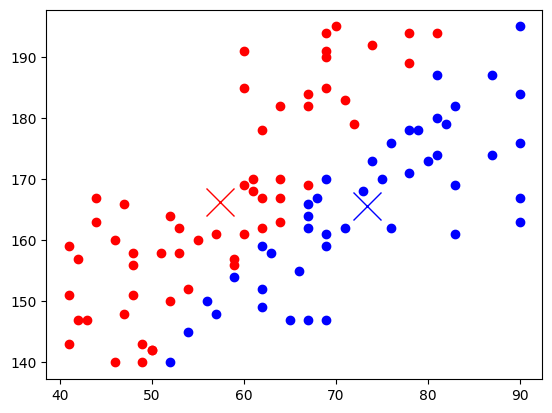

In [57]:
plt.plot([d[0] for d in group1],[d[1] for d in group1],'o',c='r')
plt.plot([d[0] for d in group2],[d[1] for d in group2],'o',c='b')
plt.plot(random_points[0][0],random_points[0][1], 'x', color='r', markersize=20)
plt.plot(random_points[1][0],random_points[1][1], 'x', color='b', markersize=20)

# 3. 전체 코드(for문 이용)

1 번째 points : [[70.08823529411765, 175.27941176470588], [55.40625, 148.375]]
2 번째 points : [[73.0, 176.73333333333332], [53.975, 151.575]]
3 번째 points : [[74.03571428571429, 177.5], [54.38636363636363, 152.88636363636363]]
4 번째 points : [[74.73076923076923, 178.55769230769232], [55.270833333333336, 153.79166666666666]]
5 번째 points : [[75.40816326530613, 179.28571428571428], [55.76470588235294, 154.54901960784315]]
6 번째 points : [[75.87234042553192, 179.7872340425532], [56.094339622641506, 155.03773584905662]]
7 번째 points : [[76.1086956521739, 180.04347826086956], [56.25925925925926, 155.27777777777777]]
8 번째 points : [[76.1086956521739, 180.04347826086956], [56.25925925925926, 155.27777777777777]]
9 번째 points : [[76.1086956521739, 180.04347826086956], [56.25925925925926, 155.27777777777777]]
10 번째 points : [[76.1086956521739, 180.04347826086956], [56.25925925925926, 155.27777777777777]]


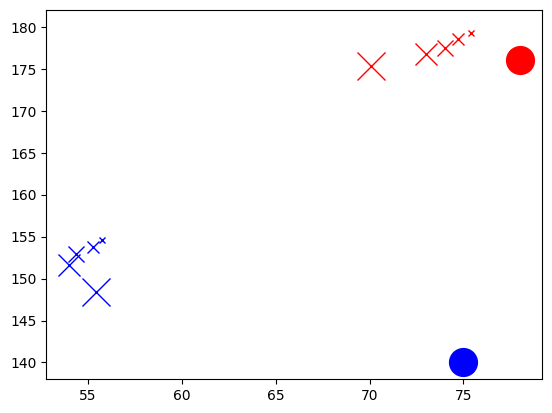

In [177]:
data = []
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,170)]) # 여자데이터
    data.append([random.randint(60,90), random.randint(160,195)]) # 남자데이터

# 랜덤포인트 지정
random_points = [[random.randint(40,95),random.randint(140,195)],
                 [random.randint(40,95),random.randint(140,195)]]
plt.plot(random_points[0][0],random_points[0][1], 'o', color='r', markersize=20)
plt.plot(random_points[1][0],random_points[1][1], 'o', color='b', markersize=20)
a = random_points[0]
b = random_points[1]


for i in range(10):
    # 반갈죽
    group1 = []
    group2 = []
    for d in data:
        if dist(random_points[0],d) < dist(random_points[1],d):
            group1.append(d) # 빨간 X랑 더 가까운 그룹
        else:
            group2.append(d) # 파란 X랑 더 가까운 그룹
    len(group1), len(group2)
    # 새로운 기준점 설정
    sumX, sumY = 0,0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    random_points[0] = [sumX/len(group1), sumY/len(group1)]
    sumX, sumY = 0,0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    random_points[1] = [sumX/len(group2), sumY/len(group2)]
    print(i+1, '번째 points :',random_points)
    plt.plot(random_points[0][0],random_points[0][1], 'x', color='r',markersize=20-i*4)
    plt.plot(random_points[1][0],random_points[1][1], 'x', color='b',markersize=20-i*4)

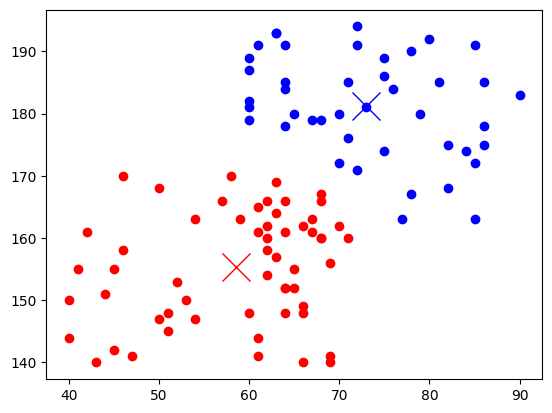

In [173]:
plt.plot([d[0] for d in group1],[d[1] for d in group1],'o',c='r')
plt.plot([d[0] for d in group2],[d[1] for d in group2],'o',c='b')
plt.plot(random_points[0][0],random_points[0][1], 'x', color='r', markersize=20)
plt.plot(random_points[1][0],random_points[1][1], 'x', color='b', markersize=20)

# 4. API(sklearn)를 이용한 군집화
- sklearn 머신러닝
    * 예측모델
        
        분류, 회귀, 군집분석
        
        fit(학습), predict(예측)
    * 변환모델

        전처리 ex. 스케일조정

        fit(학습), transform(변환함수)

In [194]:
# 군집분석 라이브러리가 joblib 충돌 결고 메세지 출력
import os
os.environ['OMP_NUM_THREADS'] = "1"

In [195]:
data = np.array(data)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,    # 2개 그룹으로 나누기 
               init='random',   # 초기 중심점 랜덤하게
               n_init=10,        # 10번실행
               random_state=7) 
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [196]:
model.cluster_centers_

array([[ 57.25423729, 156.27118644],
       [ 77.09756098, 181.63414634]])

In [197]:
model.labels_

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [200]:
group1 = data[model.labels_==1]
group2 = data[model.labels_==0]
c1, c2 = model.cluster_centers_

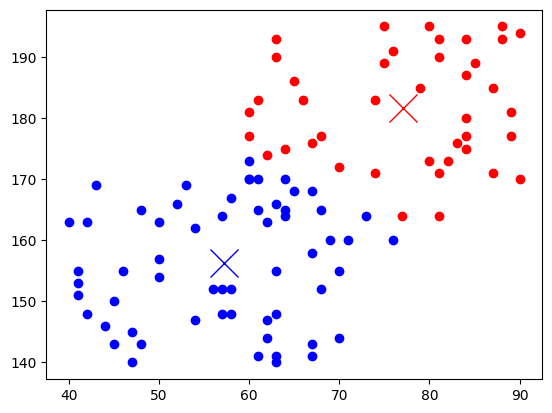

In [209]:
plt.plot([d[0] for d in group1],[d[1] for d in group1],'o',c='r')
plt.plot([d[0] for d in group2],[d[1] for d in group2],'o',c='b')
plt.plot(c1[0], c1[1], 'x', c='b', markersize=20)
plt.plot(c2[0], c2[1], 'x', c='r',markersize=20)
